# HomeWork 1 Question 3

In [38]:
# Import our libraries
import numpy as np
import matplotlib.pyplot as plt

## (PART A) Create the Training Dataset

In [39]:
# uniformly spaced input values xn
training_set = np.linspace(0, 1, 10)

print("training set input values: \n", training_set)

training set input values: 
 [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


In [40]:
# Create the target dataset 
sine = []
target_set = []

# populate the target set (adding a gaussian distribution to sin(2pi(x))) 
for num in training_set:
    # model
    sine.append(np.sin(2*np.pi*num))
    # gaussian noise: mean 0 and variance 2 (sqrt of standard deviation)
    random_noise =  np.random.normal(loc = 0, scale = np.sqrt(0.2))
    print("Random Noise: ", random_noise)
    target_set.append(np.sin(2*np.pi*num) + random_noise)
    
print("\n Model: \n ", sine)
print("\nTarget set: \n", target_set)

Random Noise:  0.018285847400969182
Random Noise:  0.39336283976542324
Random Noise:  -0.31025798094046736
Random Noise:  0.26789964230017477
Random Noise:  0.03517010005706092
Random Noise:  -0.5759981075115904
Random Noise:  -0.07883823059628853
Random Noise:  0.008229709995642326
Random Noise:  -0.021717380462665394
Random Noise:  -0.16855926915174907

 Model: 
  [0.0, 0.6427876096865393, 0.984807753012208, 0.8660254037844387, 0.3420201433256689, -0.34202014332566866, -0.8660254037844385, -0.9848077530122081, -0.6427876096865396, -2.4492935982947064e-16]

Target set: 
 [0.018285847400969182, 1.0361504494519624, 0.6745497720717406, 1.1339250460846135, 0.3771902433827298, -0.9180182508372591, -0.9448636343807271, -0.9765780430165658, -0.6645049901492049, -0.16855926915174932]


## (PART B) Curve Fitting

Polynomial form:   
-1.602 x + 0.7579


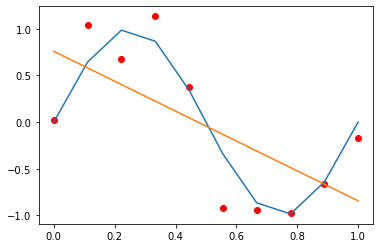

In [41]:
# Polynomial curve fitting using polyfit
# Computes optimal weights
model_1 = np.polyfit(training_set, target_set, 1)
poly_1 = np.poly1d(model_1)
print("Polynomial form: ", poly_1)

# This is an example of underfitting (not complex enough)
# Blue = Model
# Red = Training Data
# Orange = Learned Model
plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly_1(training_set))

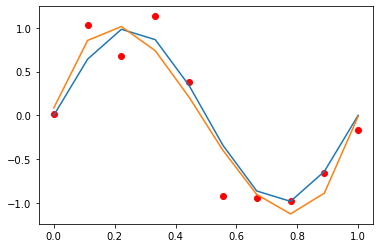

In [42]:
# plotting a model with complexity M = 3
model_3 = np.polyfit(training_set, target_set, 3)
poly_3 = np.poly1d(model_3)

plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly_3(training_set))

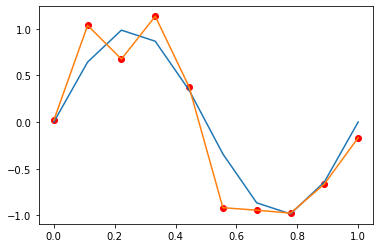

In [43]:
# plotting a model with complexity M = 9
model_9 = np.polyfit(training_set, target_set, 9)
poly_9 = np.poly1d(model_9)

plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly_9(training_set))

If the complexity of the model is too low, it will underfit, meaning that the model will not be accurate on the given training and will not generalize well either. If the complexity of the model is too high, it will overfit, meaning that the model will be extremely accurate on the training data, but will not generalize will to other data sets.  

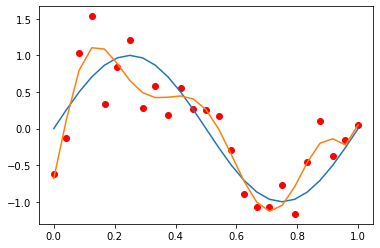

In [44]:
# Now to test complexity M = 9 with varying data set sizes
# N = 25
training_set = np.linspace(0, 1, 25)

sine = []
target_set = []

for num in training_set:
    sine.append(np.sin(2*np.pi*num))
    target_set.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))
    
model = np.polyfit(training_set, target_set, 9)
poly = np.poly1d(model)

plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly(training_set))

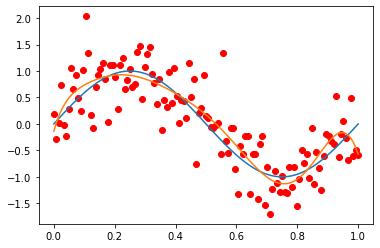

In [45]:
# N = 125
training_set = np.linspace(0, 1, 125)

sine = []
target_set = []

# populate the sine graph for visualization 
# populate the target set (adding a gaussian distribution to sin(2pi(x))) 
for num in training_set:
    sine.append(np.sin(2*np.pi*num))
    target_set.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))
    
model = np.polyfit(training_set, target_set, 9)
poly = np.poly1d(model)

plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly(training_set))

The problem of overfitting goes away with the increase in training set size. As the training set increases, the model overfits less (will generalize better). 

## (PART C) Model Selection 



[-0.29939205 -0.29939205 -0.29939205 -0.29939205 -0.29939205 -0.29939205
 -0.29939205 -0.29939205 -0.29939205 -0.29939205]

training at (1)
0.35606367032969577

training at (2)
0.312696551357839

training at (3)
0.686762912948646

training at (4)
0.3142860788889723

training at (5)
0.45104938183305116

training at (6)
0.5128181752176759

training at (7)
2.3338492886966935

training at (8)
9.768087882194915e-06

training at (9)
0.015645997180855704


[ 0.28992338  0.1589644   0.02800541 -0.10295357 -0.23391256 -0.36487154
 -0.49583053 -0.62678951 -0.7577485  -0.88870748]

training at (1)
0.019141901965605987

training at (2)
0.05372906379671241

training at (3)
0.39976929965313224

training at (4)
0.24515643358999092

training at (5)
0.3673846164911939

training at (6)
0.2700618611814525

training at (7)
1.4407120397100122

training at (8)
0.20723531115419297

training at (9)
0.5103664909732726


[ 0.49454527  0.22717169 -0.00609824 -0.20526452 -0.37032715 -0.50128614
 -0.59814147 -0.

C:\Users\angel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


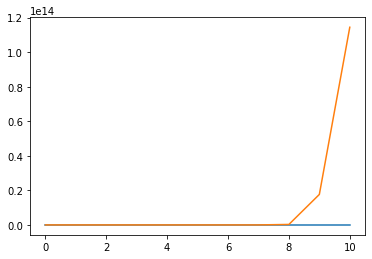

In [244]:
RMS_training_plot = []
RMS_testing_plot = []

N = 10
training_set = np.linspace(0, 1, N)
# New indpendent test set to compute RMS error on 
test_set = [0.2, 1.7, 2.6, 3.2, 4.4, 5.1, 6.4, 7.3, 8.6, 9.8]

target_set = []

complexity = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for num in training_set:
    target_set.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))

for M in complexity: 
    
    # find weights for current complexity with polyfit
    model = np.polyfit(training_set, target_set, M)
    poly = np.poly1d(model)
    
    # y(xn, w*) error array for our current complexity 
    error_tr = poly(training_set)
    print("\n")
    print(error_tr)
    error_t = poly(test_set)
    
    # Want this summation calculated for every complexity 
    error_sum_tr = []
    error_sum_t = []
    
    for i in range(1, N):
        # finding the difference for every true value 
        temp_tr = np.square(error_tr[i] - target_set[i])
        print(f"\ntraining at ({i})")
        print(temp_tr)
        temp_t = np.square(error_t[i] - test_set[i])
        #print("\ntesting")
        #print(temp_t)
        
        error_sum_tr.append(temp_tr)
        error_sum_t.append(temp_t)
        
    # Finding E(w*)
    optimal_error_tr = (0.5 * sum(error_sum_tr))
    optimal_error_t = (0.5 * sum(error_sum_t))
    
    RMS_training = np.sqrt((2 * optimal_error_tr)/N)
    RMS_training_plot.append(RMS_training)

    RMS_testing = np.sqrt((2 * optimal_error_t)/N)
    RMS_testing_plot.append(RMS_testing)

print("RMS training results:")
print(RMS_training_plot)

print("RMS testing results:")
print(RMS_testing_plot)

plt.plot(complexity, RMS_training_plot)
plt.plot(complexity, RMS_testing_plot)

In [230]:
# (Part D) Overtuning
N = 10
training_set = np.linspace(0, 1, N)
# New indpendent test set to compute RMS error on 
test_set = [0.2, 1.7, 2.6, 3.2, 4.4, 5.1, 6.4, 7.3, 8.6, 9.8]

target_set = []

complexity = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for num in training_set:
    target_set.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))
    
print("\n True values")
print(target_set)
    
for M in complexity: 
    
    # find weights for current complexity with polyfit
    model = np.polyfit(training_set, target_set, M)
    poly = np.poly1d(model)
    print(f"\nWeights at complexity M = {M}:")
    print(poly(training_set))


 True values
[0.19739715513453293, 0.5670871992420119, 1.5221781829561367, 0.16320291128584763, 0.5797726028481375, 0.24098554223251945, -1.3436264396469264, -0.8958240800798709, -1.465207258740663, -0.9435780166119134]

Weights at complexity M = 0:
[-0.13776122 -0.13776122 -0.13776122 -0.13776122 -0.13776122 -0.13776122
 -0.13776122 -0.13776122 -0.13776122 -0.13776122]

Weights at complexity M = 1:
[ 0.99253308  0.74135657  0.49018006  0.23900355 -0.01217297 -0.26334948
 -0.51452599 -0.7657025  -1.01687901 -1.26805552]

Weights at complexity M = 2:
[ 0.69064938  0.64072867  0.54049401  0.38994539  0.18908283 -0.06209368
 -0.36358414 -0.71538855 -1.11750691 -1.56993922]

Weights at complexity M = 3:
[ 0.12311875  0.82990554  1.01343619  0.80883705  0.35123444 -0.22424528
 -0.78247579 -1.18833073 -1.30668378 -1.00240859]

Weights at complexity M = 4:
[ 0.16661923  0.77673829  0.97235241  0.81608713  0.39473492 -0.18074481
 -0.77522571 -1.22941451 -1.35985103 -0.95890812]

Weights at co

C:\Users\angel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# (Part E) Regularization